In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import numpy as np
from save_recipes import agg_data
from featurize_ingredients import choose_top_grams, featurize_ingredients
import matplotlib.pyplot as plt

In [3]:
all_dfs_nutrient = agg_data()
# all_dfs_nutrient = pd.read_csv("clean_data/all_recipes_nutrient.csv")
all_dfs_nutrient.columns

60 datasets found


/Users/sleepearly/Projects/recipe_rex/save_recipes.py:26: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  all_dfs['nutrients'] = all_dfs['nutrients'].apply(lambda x: yaml.load(x))


number of recipes 2046
Using 498 unigrams that occur over 20 times
Using 491 bigrams that occur over 20 times


Index(['index', 'title', 'author', 'url', 'cuisine', 'image_url',
       'ingredients', 'instructions', 'language', 'ratings', 'reviews',
       'site_name', 'total_time', 'yields', 'servingSize', 'calories',
       'carbohydrateContent', 'proteinContent', 'fatContent',
       'saturatedFatContent', 'cholesterolContent', 'sodiumContent',
       'sugarContent', 'fiberContent', 'transFatContent',
       'unsaturatedFatContent', 'ingredients_encoding'],
      dtype='object')

In [5]:
# This logic is in agg_data already
check_intermediates = False
if check_intermediates:
    # Get top grams
    top_unigram_cts, top_bigram_cts, gram2idx = choose_top_grams(all_dfs_nutrient)

    # Plot top occurring ingredients (long tail unploted)
    fig, axs = plt.subplots(2,1, sharex=True)
    axs[0].set_xlim([0,250])
    _ = axs[0].hist(top_unigram_cts.values(), bins=200)
    _ = axs[1].hist(top_bigram_cts.values(), bins=200)

    # Featurize ingredients
    all_dfs_nutrient = featurize_ingredients(all_dfs_nutrient, gram2idx)

Number of ingredient grams per recipe


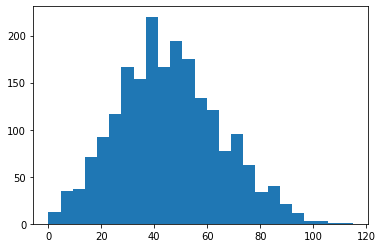

In [6]:
print("Number of ingredient grams per recipe")
encodings = np.stack(all_dfs_nutrient["ingredients_encoding"])
_ = plt.hist(np.sum(encodings, axis=1), bins=25)